In [1]:
import pyart
import scipy
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [33]:
data_dir='/Users/rrniii/jasmin_ncas_vol2/data/xband/chilbolton/cfradial/calib_v1/sur/20170706/'

In [34]:
files=glob(data_dir+'*.nc')
len(files)

214

In [44]:
radar=pyart.io.read(files[92])


In [45]:
radar.fields.keys()

dict_keys(['CCOR', 'CCORv', 'DOP', 'DOPu', 'KDP', 'PhiDP', 'RhoHV', 'RhoHVu', 'SNR', 'SNRu', 'SNRv', 'SNRvu', 'SQI', 'SQIu', 'SQIv', 'SQIvu', 'V', 'Vu', 'Vv', 'Vvu', 'W', 'Wu', 'Wv', 'Wvu', 'ZDR', 'ZDRu', 'dBZ', 'dBZv', 'dBuZ', 'dBuZv', 'uKDP', 'uKDPu', 'uPhiDP', 'uPhiDPu'])

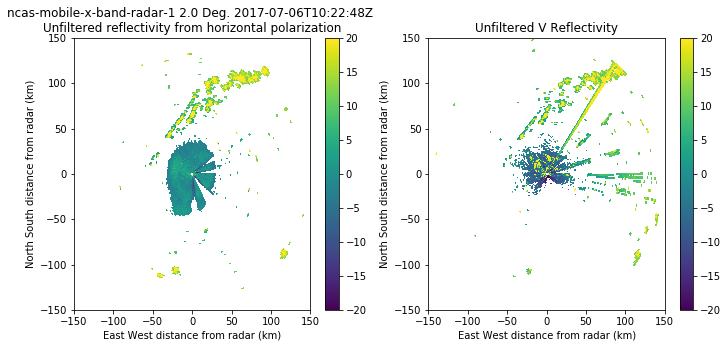

In [38]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(131)
display = pyart.graph.RadarDisplay(radar)
display.plot('dBuZ',3 , ax=ax1, vmin=-20, vmax=20.,
             colorbar_label='')

ax2 = fig.add_subplot(132)
display = pyart.graph.RadarDisplay(radar)
display.plot('dBuZv', 0, ax=ax2, vmin=-20, vmax=20.,
             colorbar_label='', title='Unfiltered V Reflectivity')

In [58]:
radar.nsweeps

10

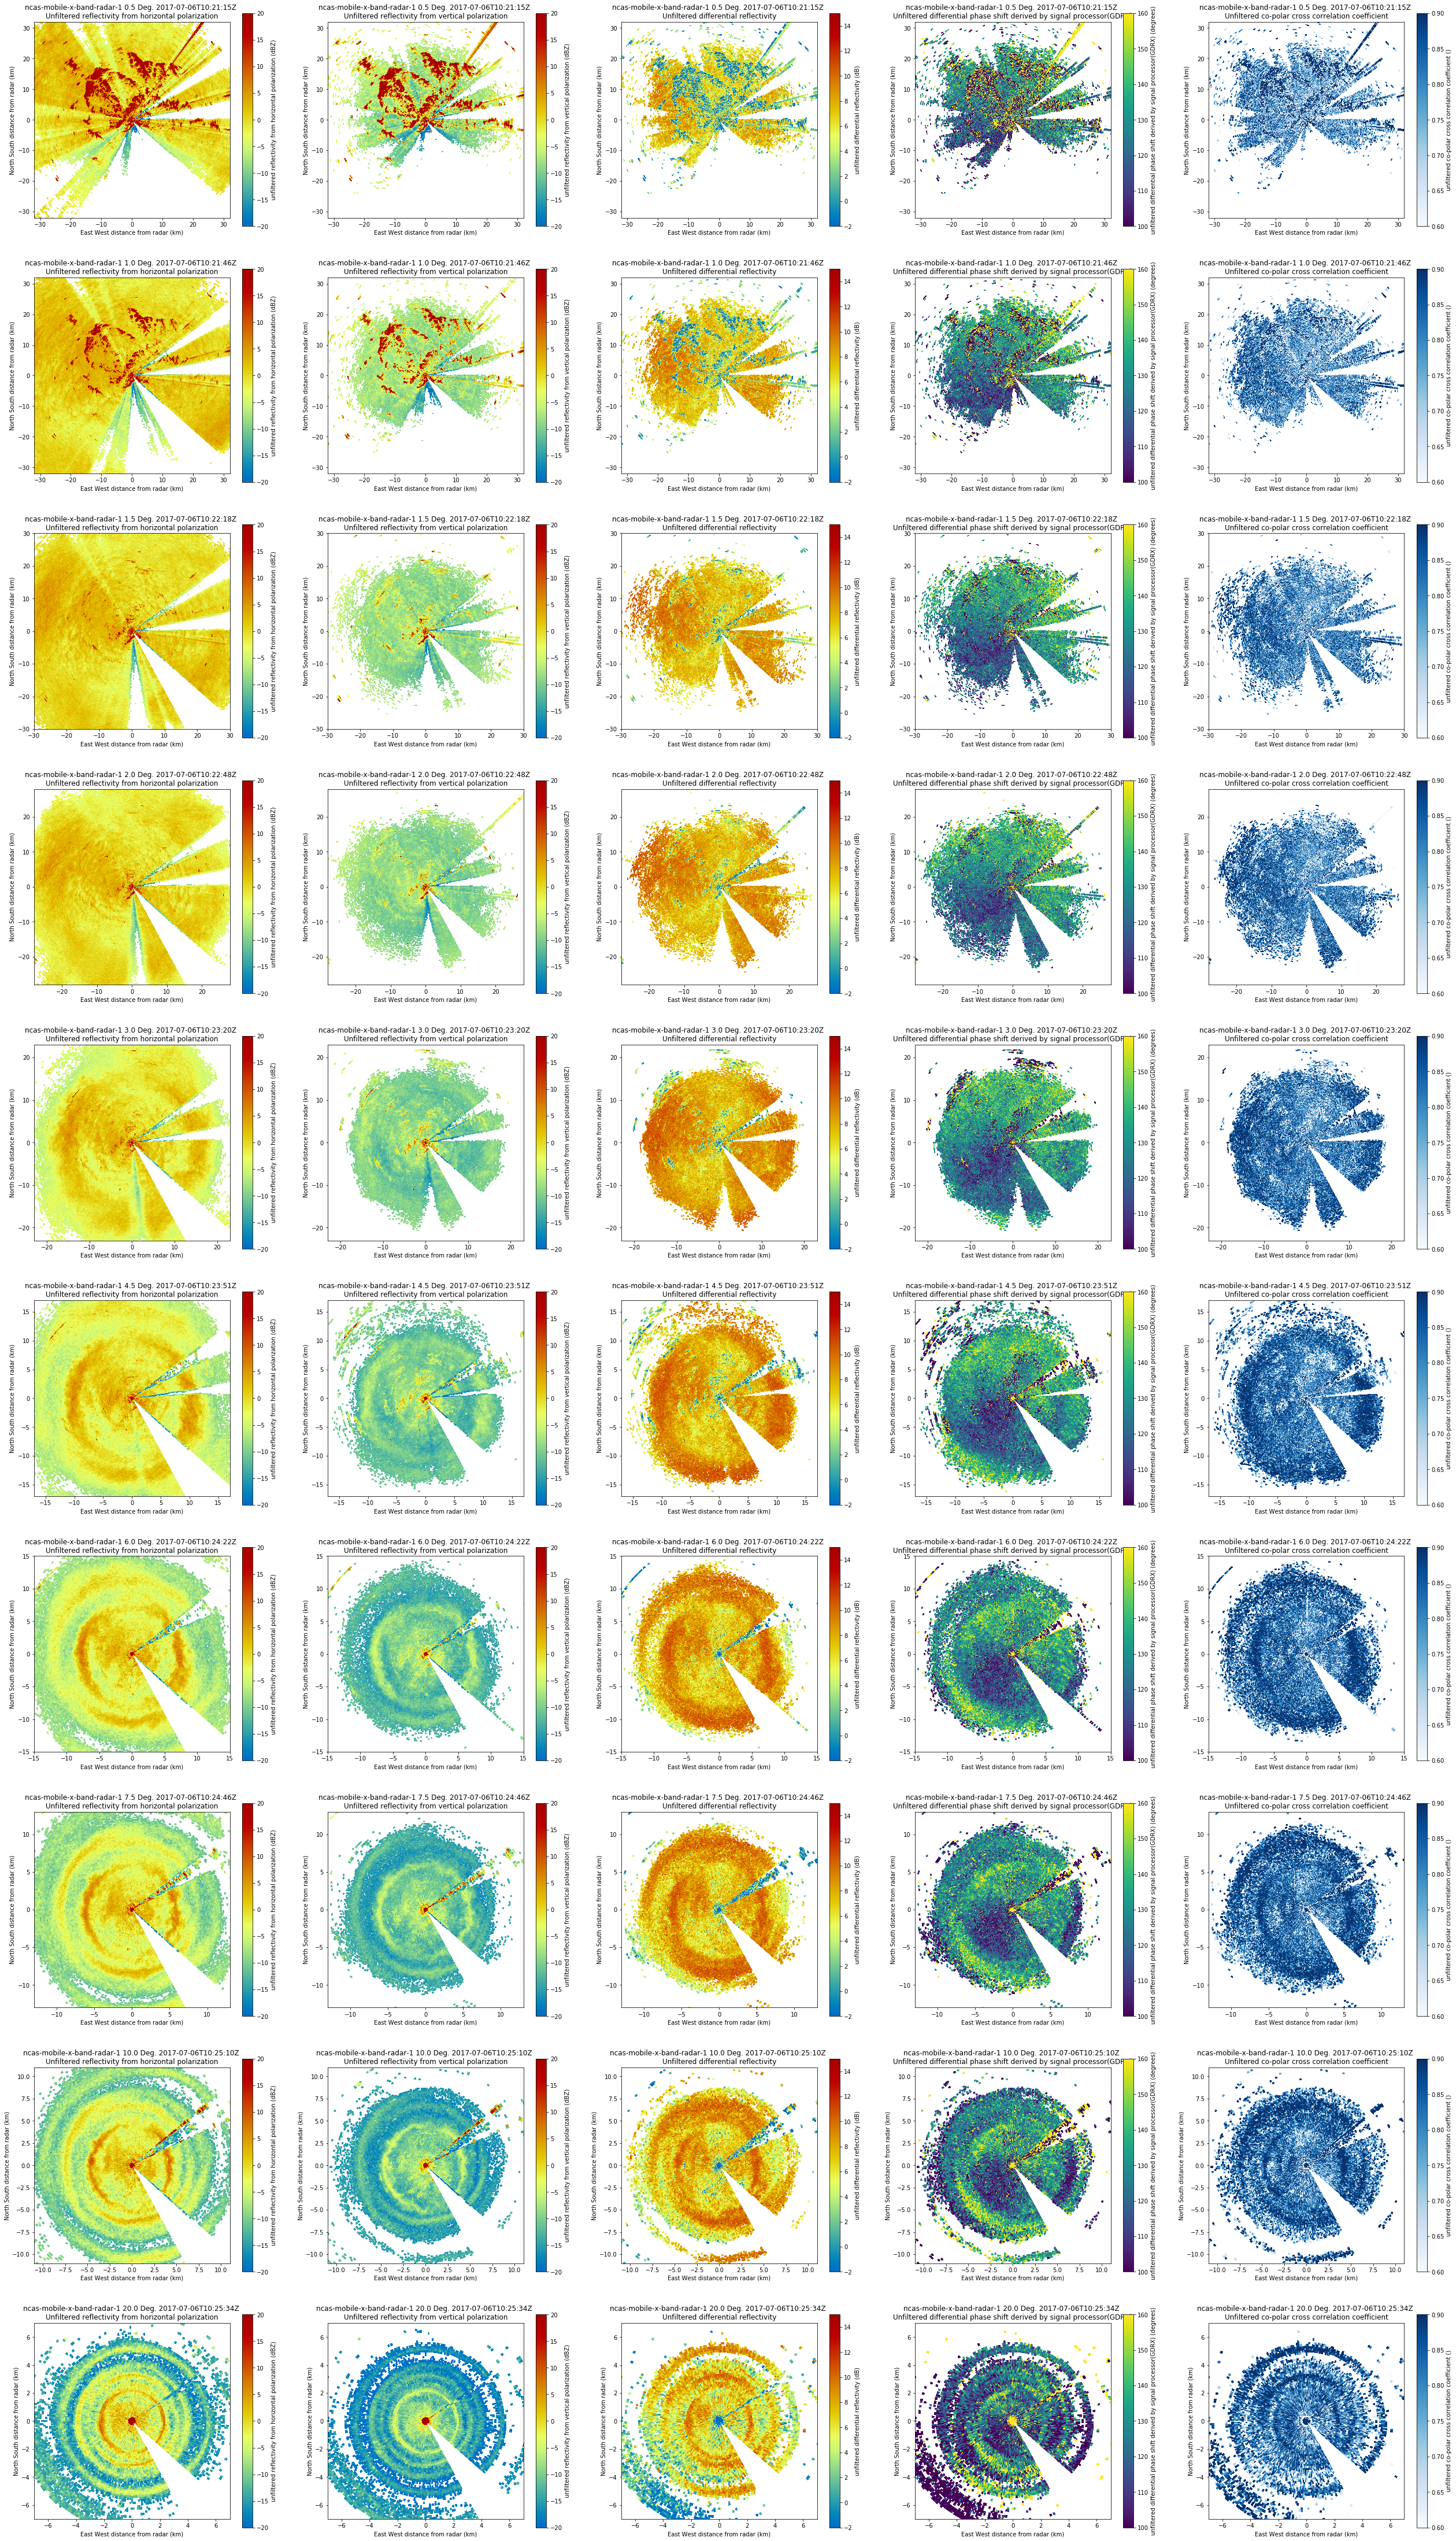

In [108]:
axes=5
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize = (44,80))
fig.patch.set_facecolor('white')
for i in range(radar.nsweeps):
    ax1 = fig.add_subplot(radar.nsweeps,axes,i*axes+1)
    ax2 = fig.add_subplot(radar.nsweeps,axes,i*axes+2)
    ax3 = fig.add_subplot(radar.nsweeps,axes,i*axes+3)
    ax4 = fig.add_subplot(radar.nsweeps,axes,i*axes+4)
    ax5 = fig.add_subplot(radar.nsweeps,axes,i*axes+5)
    
    display.plot_ppi('dBuZ', sweep = i, fig = fig, ax = ax1, vmin = -20, vmax = 20, cmap = 'pyart_HomeyerRainbow')
    display.plot_ppi('dBuZv', sweep = i, fig = fig, ax = ax2, vmin = -20, vmax = 20, cmap = 'pyart_HomeyerRainbow')
    display.plot_ppi('ZDRu', sweep = i, fig = fig, ax = ax3, vmin = -2, vmax = 15, cmap = 'pyart_HomeyerRainbow')
    display.plot_ppi('uPhiDPu', sweep = i, fig = fig, ax = ax4, vmin = 100, vmax =160, cmap = 'viridis')
    display.plot_ppi('RhoHVu', sweep = i, fig = fig, ax = ax5, vmin = 0.6, vmax = .9, cmap = 'Blues')
    
    for ax in [ax1,ax2,ax3, ax4, ax5]:
        if i<2:
            ax.set_xlim([-32,32])
            ax.set_ylim([-32,32])
        elif i<3:
            ax.set_xlim([-30,30])
            ax.set_ylim([-30,30])
        elif i<4:
            ax.set_xlim([-28,28])
            ax.set_ylim([-28,28])
        elif i<5:
            ax.set_xlim([-23,23])
            ax.set_ylim([-23,23])
        elif i<6:
            ax.set_xlim([-17,17])
            ax.set_ylim([-17,17])
        elif i<7:
            ax.set_xlim([-15,15])
            ax.set_ylim([-15,15])
        elif i<8:
            ax.set_xlim([-13,13])
            ax.set_ylim([-13,13])       
        elif i<9:
            ax.set_xlim([-11,11])
            ax.set_ylim([-11,11])   
        else:
            ax.set_xlim([-7,7])
            ax.set_ylim([-7,7])
        
        ax.set_aspect('equal')
    
plt.show()
plt.close()